In [73]:
#importy ktore beda potrzebne do cwiczenia
import pandas as pd
import os
import re
import numpy as np
import matplotlib.pyplot as plt

In [74]:
dane=pd.read_csv('10_POMORSKIE.csv')
dane.drop('Unnamed: 0',axis=1, inplace=True)
#zmieniam nazwy kolumn poniewazposiadaly spacje oraz usuwam wiersze, ktore w kolumnie plci maja "bd."
dane.rename(columns = {'Dni od zakupu':'Dni_od_zakupu', 'Wiek kupującego':'Wiek_kupujacego','Płeć kupującego':'Plec_kupujacego'}, inplace = True)
danenew = dane[dane['Plec_kupujacego'] !='bd.']
danenew.reset_index(drop=True, inplace=True)
danenew

,Dni_od_zakupu,Marka,Wiek_kupujacego,Plec_kupujacego,Ocena
0,14,Tefal,48.0,K,2.5
1,5,Samsung,50.0,M,1.5
2,7,Electrolux,40.0,M,2.0
3,10,Tefal,32.0,K,3.0
4,6,Samsung,40.0,M,2.5
...,...,...,...,...,...
279,6,Beko,41.0,M,2.0
280,4,Tefal,28.0,K,3.0
281,7,Samsung,62.0,M,4.0
282,2,Tefal,37.0,K,4.0


In [75]:
#usuwam wiersze, ktore maja w kolumnie wieku NaN
danenew.sort_values(by=['Wiek_kupujacego'], inplace=True)
danenew1=danenew.dropna()
danenew1.reset_index(drop=True, inplace=True)
danenew1

C:\Users\jakub\AppData\Local\Temp\ipykernel_14944\4108378528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  danenew.sort_values(by=['Wiek_kupujacego'], inplace=True)


,Dni_od_zakupu,Marka,Wiek_kupujacego,Plec_kupujacego,Ocena
0,7,Tefal,18.0,K,2.0
1,9,Samsung,19.0,M,5.0
2,13,Tefal,19.0,M,1.5
3,6,Samsung,20.0,M,4.0
4,8,Beko,20.0,K,2.5
...,...,...,...,...,...
255,3,Beko,60.0,M,2.0
256,8,Electrolux,60.0,K,5.0
257,7,Samsung,62.0,M,4.0
258,4,Beko,64.0,K,1.0


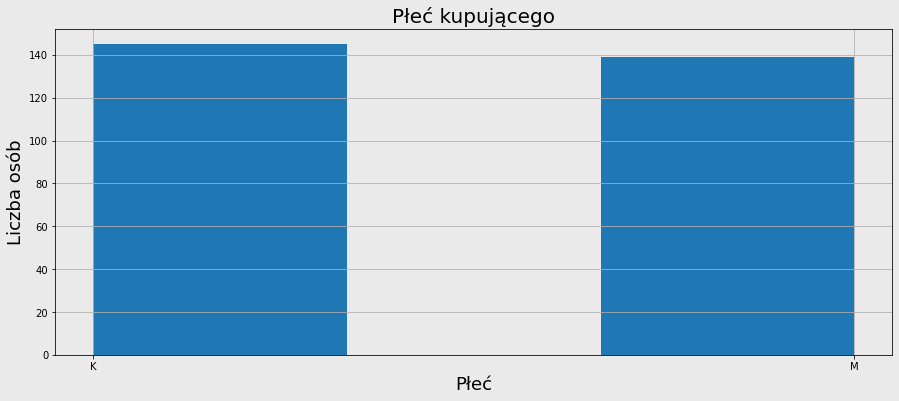

In [76]:
#histogram pokazujący rozklad plci
facecolor = '#EAEAEA'
color_bars = '#EAEAEA'
fig, ax = plt.subplots(1, figsize=(15, 6), facecolor=facecolor)
ax.set_facecolor(facecolor)
danenew["Plec_kupujacego"].hist(bins=3)
plt.title("Płeć kupującego", fontsize=20)
plt.xlabel("Płeć", fontsize=18)
plt.ylabel("Liczba osób", fontsize=18)
fig.savefig("C:/Users/jakub/Desktop/repo AIBD\AiBD-sem-5/lab6/Rozklad_plci.png")

In [77]:
#dziele dane poprzez plec
daneman=danenew1.loc[danenew1['Plec_kupujacego'].isin(['M'])]
daneman.reset_index(drop=True, inplace=True)
daneman

,Dni_od_zakupu,Marka,Wiek_kupujacego,Plec_kupujacego,Ocena
0,9,Samsung,19.0,M,5.0
1,13,Tefal,19.0,M,1.5
2,6,Samsung,20.0,M,4.0
3,6,Tefal,21.0,M,1.0
4,6,Tefal,22.0,M,2.5
...,...,...,...,...,...
118,10,Samsung,59.0,M,0.5
119,8,Tefal,60.0,M,4.0
120,3,Beko,60.0,M,2.0
121,7,Samsung,62.0,M,4.0


In [78]:
danewoman=danenew1.loc[danenew1['Plec_kupujacego'].isin(['K'])]
danewoman.reset_index(drop=True, inplace=True)
danewoman

,Dni_od_zakupu,Marka,Wiek_kupujacego,Plec_kupujacego,Ocena
0,7,Tefal,18.0,K,2.0
1,8,Beko,20.0,K,2.5
2,7,Tefal,22.0,K,1.0
3,9,Tefal,22.0,K,1.0
4,7,Beko,23.0,K,4.0
...,...,...,...,...,...
132,9,Beko,59.0,K,3.5
133,1,Beko,59.0,K,1.5
134,10,Samsung,60.0,K,2.0
135,8,Electrolux,60.0,K,5.0


In [79]:
# Informacje od dataframie meżczyzn
daneman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Dni_od_zakupu    123 non-null    int64  
 1   Marka            123 non-null    object 
 2   Wiek_kupujacego  123 non-null    float64
 3   Plec_kupujacego  123 non-null    object 
 4   Ocena            123 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 4.9+ KB


In [80]:
# Informacje od dataframie kobiet
danewoman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Dni_od_zakupu    137 non-null    int64  
 1   Marka            137 non-null    object 
 2   Wiek_kupujacego  137 non-null    float64
 3   Plec_kupujacego  137 non-null    object 
 4   Ocena            137 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 5.5+ KB


In [81]:
# Podstawowy opis calego DataFramu meżczyzn
daneman.describe()

,Dni_od_zakupu,Wiek_kupujacego,Ocena
count,123.000000,123.000000,123.000000
mean,7.130081,39.203252,2.617886
std,3.051362,10.201221,1.040337
min,1.000000,19.000000,0.000000
25%,5.000000,32.500000,2.000000
50%,7.000000,40.000000,2.500000
75%,8.000000,46.000000,3.250000
max,17.000000,71.000000,5.000000


In [82]:
# Podstawowy opis calego DataFramu konbiet
danewoman.describe()

,Dni_od_zakupu,Wiek_kupujacego,Ocena
count,137.000000,137.000000,137.000000
mean,7.029197,39.489051,2.390511
std,2.467261,9.947743,1.110967
min,1.000000,18.000000,0.000000
25%,6.000000,32.000000,1.500000
50%,7.000000,39.000000,2.500000
75%,8.000000,46.000000,3.000000
max,14.000000,64.000000,5.000000


In [83]:
def plot_hist(df: pd.DataFrame, column: str, bins: int,
              title: str, x_label: str, y_label: str,
              alpha: float =0.8, rwidth: float=0.9):
              
    fig, ax = plt.subplots(figsize=(15, 10))
    n, bins, patches = ax.hist(df[column], bins=bins, alpha=alpha, rwidth=rwidth)
    plt.grid()
    plt.title(title, fontsize=25)
    plt.xlabel(x_label, fontsize=15)
    plt.ylabel(y_label, fontsize=15)
    plt.show()
    fig.savefig("C:/Users/jakub/Desktop/repo AIBD\AiBD-sem-5/lab6" + f"/{title}.png")

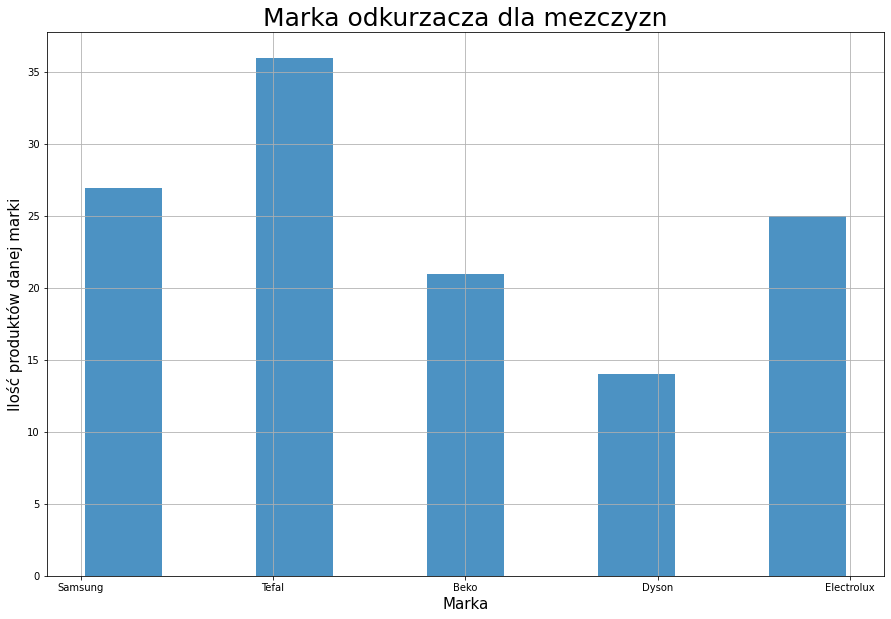

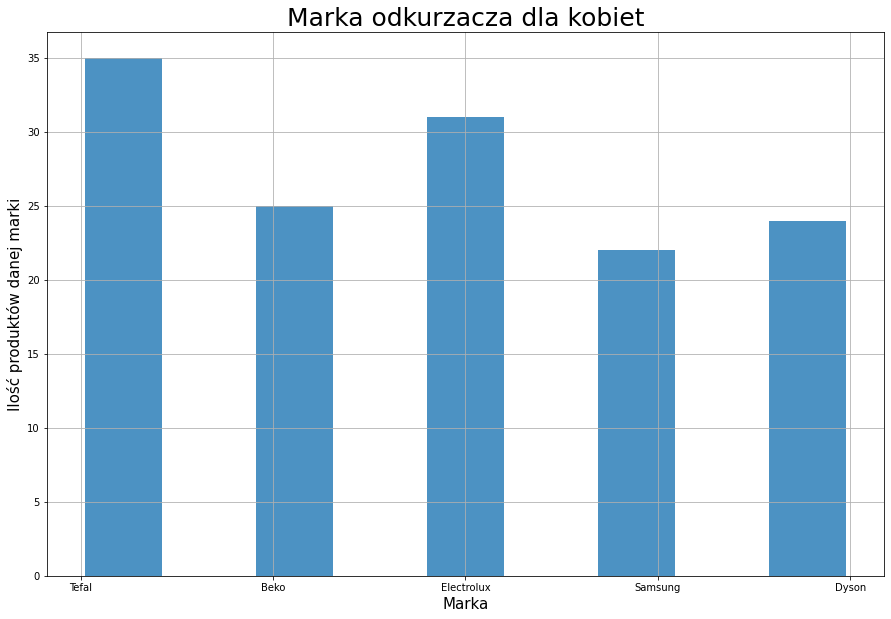

In [84]:
plot_hist(daneman, 'Marka', bins=9, title="Marka odkurzacza dla mezczyzn", x_label="Marka", y_label="Ilość produktów danej marki")
plot_hist(danewoman, 'Marka', bins=9, title="Marka odkurzacza dla kobiet", x_label="Marka", y_label="Ilość produktów danej marki")

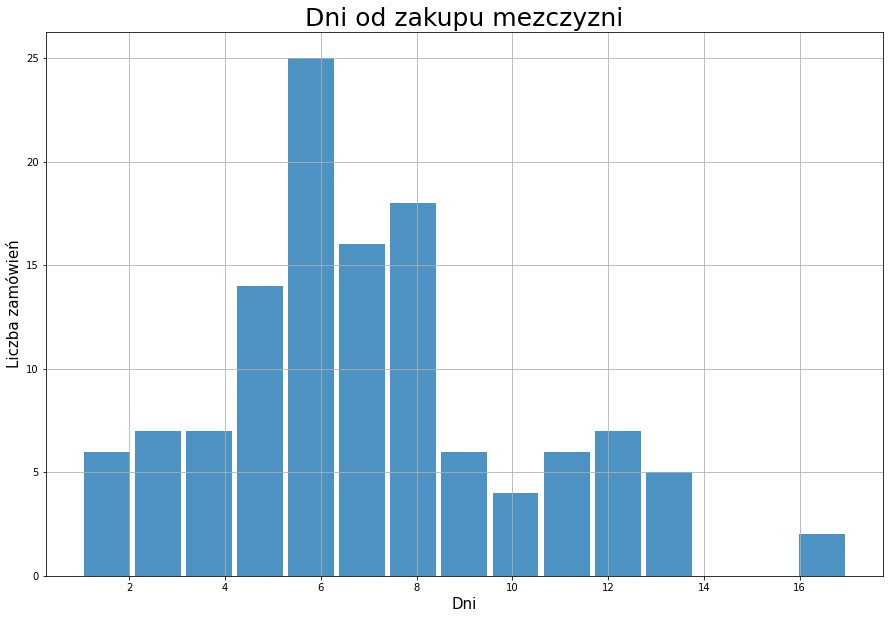

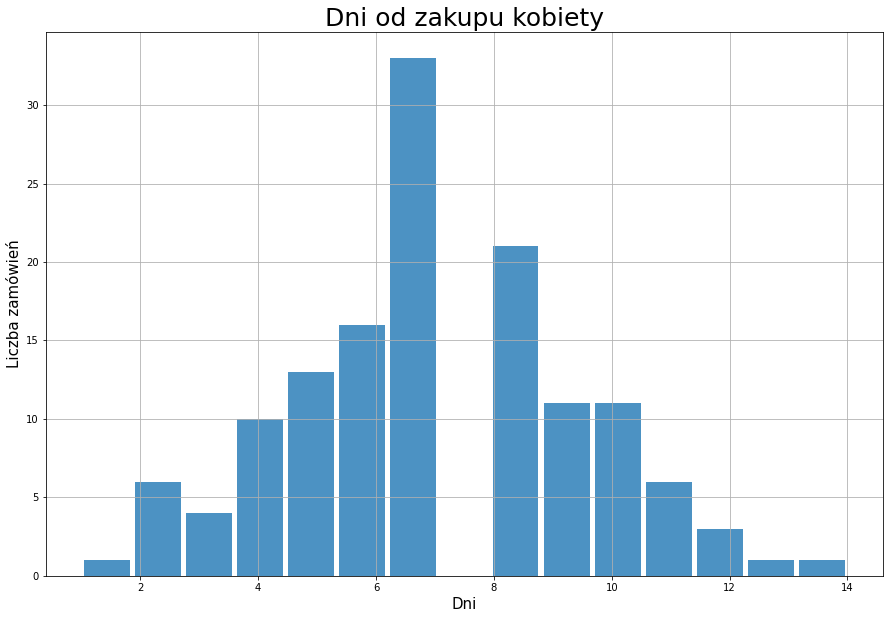

In [85]:
plot_hist(daneman, "Dni_od_zakupu", bins=15, title="Dni od zakupu mezczyzni", x_label="Dni", y_label="Liczba zamówień")
plot_hist(danewoman, "Dni_od_zakupu", bins=15, title="Dni od zakupu kobiety", x_label="Dni", y_label="Liczba zamówień")

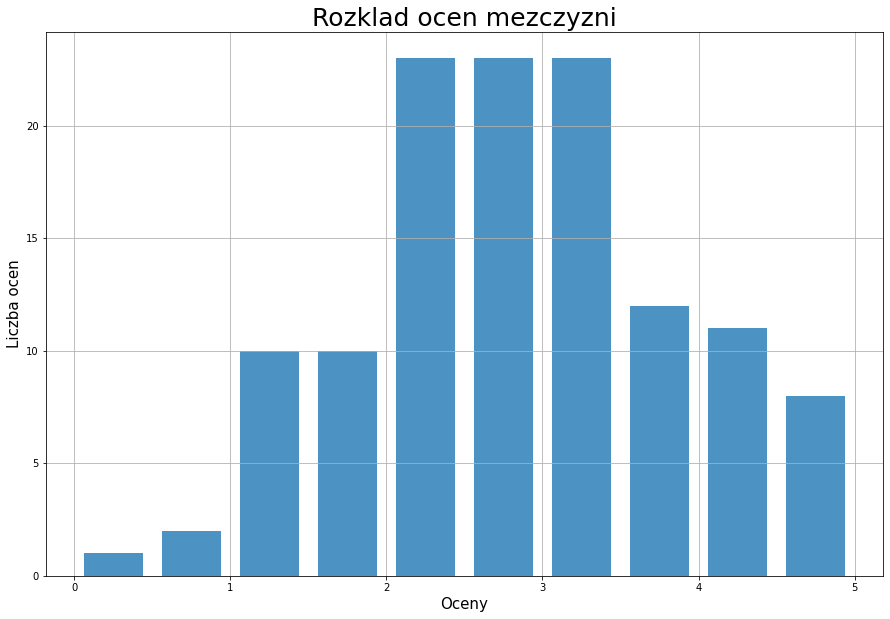

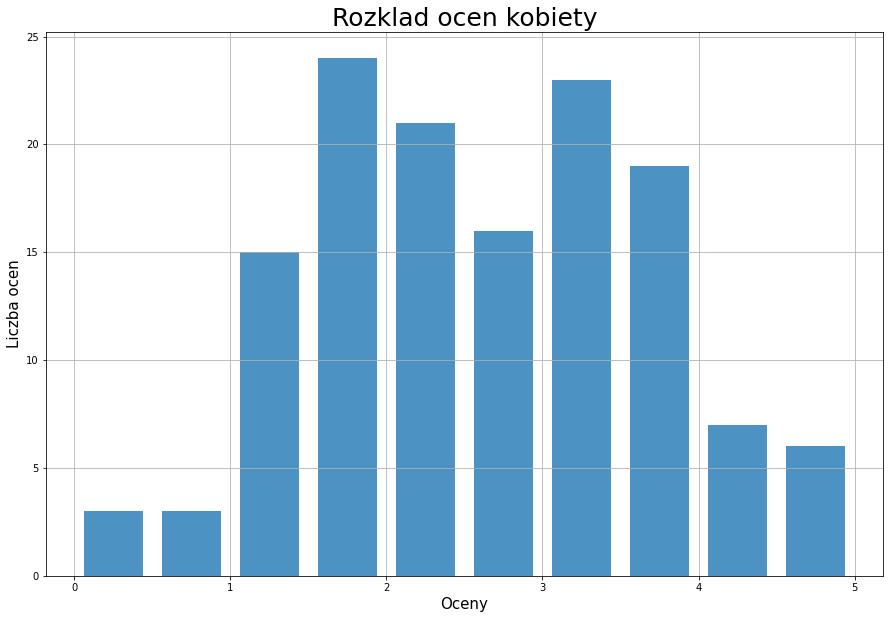

In [86]:
plot_hist(daneman, 'Ocena', bins=10, title="Rozklad ocen mezczyzni", x_label="Oceny", y_label="Liczba ocen", rwidth=0.75)
plot_hist(danewoman, 'Ocena', bins=10, title="Rozklad ocen kobiety", x_label="Oceny", y_label="Liczba ocen", rwidth=0.75)

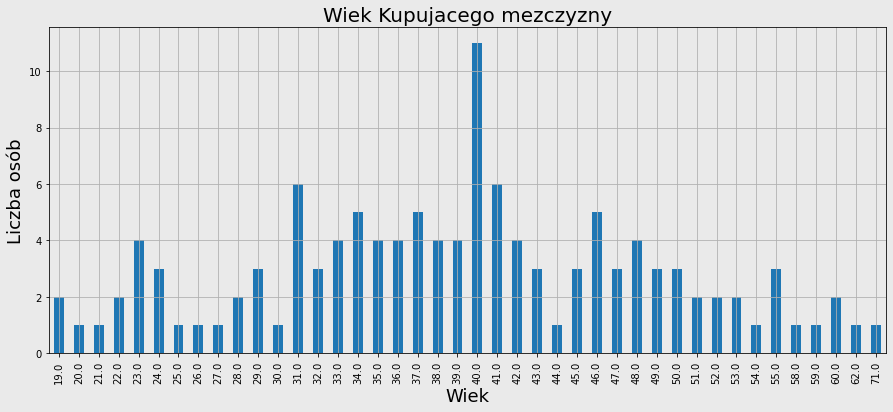

In [87]:
fig, ax = plt.subplots(1, figsize=(15, 6), facecolor=facecolor)
ax.set_facecolor(facecolor)
wiek_kupujacego_m = daneman["Wiek_kupujacego"].value_counts(dropna=False).sort_index(ascending=True, na_position='first')
wiek_kupujacego_m.plot.bar(grid=True)
plt.title("Wiek Kupujacego mezczyzny", fontsize=20)
plt.xlabel("Wiek", fontsize=18)
plt.ylabel("Liczba osób", fontsize=18)
fig.savefig("C:/Users/jakub/Desktop/repo AIBD\AiBD-sem-5/lab6/Wiek Kupujacego mezczyzny.png")

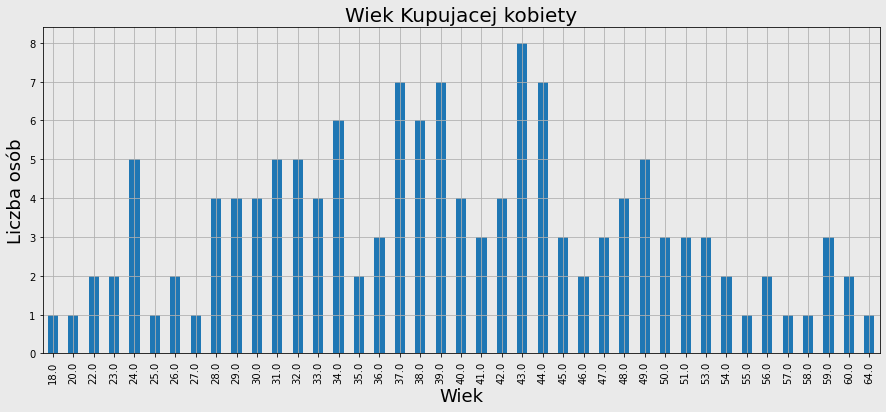

In [88]:
fig, ax = plt.subplots(1, figsize=(15, 6), facecolor=facecolor)
ax.set_facecolor(facecolor)
wiek_kupujacego_k = danewoman["Wiek_kupujacego"].value_counts(dropna=False).sort_index(ascending=True, na_position='first')
wiek_kupujacego_k.plot.bar(grid=True)
plt.title("Wiek Kupujacej kobiety", fontsize=20)
plt.xlabel("Wiek", fontsize=18)
plt.ylabel("Liczba osób", fontsize=18)
fig.savefig("C:/Users/jakub/Desktop/repo AIBD\AiBD-sem-5/lab6/Wiek Kupujacej kobiety.png")

Podsumowujac to zdanie, dostajac csv z danymi osob ktore zakupily odkurzacz danej marki zrobilem nastepujace rzeczy:
- wczytalem plik do dataframe'u,
- usunalem wiersze, ktore nie dawaly zadnej informacji o wieku czy plci kupujacego,
- podzielilem dataframe na dwa osobne w zaleznosci od plci,
- wyplotowalem histogramy (ilosci osob danj plci w zaleznosci od marki produktu, dni od zakupu w zaleznosci od ilosci zamowien, rozkladu ocen czy tez wieku dla poszczegolnych plci i ilosci osob w danym wieku)<br><br>
To ćwiczenie nauczyło mnie przygotowywac Data appendix i opisywac metadane. Moglem sobie rowniez przypomniec jak korzystac z mathplotlib'a.